### $\S$ 1. Standard MLR Model

In [1]:
library(tidyverse)
library(latex2exp)
df<- read_table2("C:/Users/Lee Sak Park/Desktop/Spring 2020/Linear Model/Notes/data_set.txt", 
                 col_names = FALSE)
colnames(df) = c("Y",'X1','X2','X3')
y = df$Y %>% as.matrix
J = rep(1, length(y))
X = cbind(J, df[c('X1','X2','X3')]) %>% as.matrix
X_transform_raw = df[c('X1','X2','X3')] %>% as.matrix
colnames(y) = NULL
colnames(X) = NULL
colnames(X_transform_raw) = NULL

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'latex2exp' was built under R version 3.6.3"Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double()
)


__Goal:__

transfrom X and Y so that we can tackle the following problems;

- determinant of $(X^T X)^{-1}$ happens to be very very close to 0

- Predictors have different orders of magnitude $\Rightarrow$ hard to interprete $B$'s

__Transformation__:

$y_i^* = \frac{1}{\sqrt{n-1}} \big( \frac{y_i - \bar{y}}{S_y} \big)$, where $S_y = \sqrt{\frac{\Sigma_{i=1}^{n} (y_i - \bar{y})^2}{n-1}}$

$X_{ik}^* = \frac{1}{\sqrt{n-1}} \big( \frac{X_{ik} - \bar{X_k}}{S_{X_k}} \big)$, where $S_{X_k} = \sqrt{\frac{\Sigma_{i=1}^{n} (X_{ik} - \bar{X_k})^2}{n-1}}$, for k $\in$ {__1__,2, ... , p-1}

In [2]:
transformation = function(mat){
    means = mat %>% apply(2, mean)
    sds = mat %>% apply(2, sd)
    for(k in 1:dim(mat)[2]){
        vec = mat[,k]
        vec = (vec-means[k])/sds[k]/sqrt(length(vec)-1)
        mat[,k] = vec
    }
    return(mat)
}

In [3]:
X_transformed = X_transform_raw %>% transformation()
y_transformed = y %>% transformation()

__$r_{XX}$ and $r_{XY}$__


* $(X^{*})^T X^* = r_{XX}$

* $(X^{*})^T Y = r_{XY}$

In [4]:
Xt_X = t(X_transformed) %*% X_transformed
Xt_X %>% round(2) ==cor(X_transform_raw)%>% round(2)

TRUE,TRUE,TRUE
TRUE,TRUE,TRUE
TRUE,TRUE,TRUE


In [5]:
Xt_y = t(X_transformed) %*% y_transformed
(Xt_y %>% round(2) == cor(X_transform_raw, y) %>% round(2)) %>% t()

TRUE,TRUE,TRUE


For standared regression, $\hat{B^*} = [r_{XX}]^{-1} r_{XY}$

In [6]:
df1 = cbind(y_transformed, X_transformed) %>% as.data.frame()
colnames(df1) = c("Y","X1","X2","X3")
std.model = lm(Y~X1+X2+X3-1, data = df1)

__summary(std.model) vs. solve(Xt_X) %$*$% Xt_y__

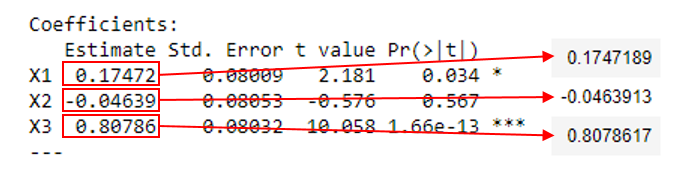

__Note: $\hat{B_k} = \frac{S_y}{S_{X_k}} \hat{B}_k^{*}$__ for k $\in$ {1,2, ... , p-1}

In [7]:
model = lm(Y~., data = df)
(model$coefficients %>% t)[2:4]

[1]  7.870804e-04 -1.316602e+01  6.235545e+02

In [8]:
B_ast = (solve(Xt_X) %∗% Xt_y)
sd(y)/(X_transform_raw %>% apply(2, sd)) * B_ast   %>% t %>% as.vector

[1]  7.870804e-04 -1.316602e+01  6.235545e+02

### $\S$ 2. Polynomial Regression

<span>&#8251;</span> __interaction regression model will be skipped__

__centralization vs raw__

__Conclusion__: centralize non-categorical variables

In [9]:
df2 = df
x2 = df2$X1^2
df2['Y'] = .0002*df2["X1"] + .000005*x2 + runif(length(df2$Y), -100,100)+rnorm(length(df2$Y), 0, 2000)
df2['X12'] = df2$X1^2
p_model = lm(Y~ ., data = df2)

In [10]:
summary(p_model)[4]

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-8.305441e+03,1.075457e+04,-0.7722708,4.438202e-01
X1,3.873226e-02,6.063485e-02,0.6387788,5.260677e-01
X2,2.805235e+02,3.877167e+02,0.7235271,4.729419e-01
X3,1.375801e+03,1.071857e+03,1.2835677,2.055857e-01
X12,4.939392e-06,8.956387e-08,55.1493810,2.249865e-44


In [11]:
df3 = df2
df3['X1'] = (df3['X1']-mean(df3$X1))
df3['X2']= (df3['X2']-mean(df3$X2))
df3['X12'] = df3$X1^2

In [12]:
p_model1 = lm(Y~ ., data = df3)
summary(p_model1)[4]

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.580487e+05,4.240975e+02,1080.0552730,6.102629e-105
X1,3.028972e+00,8.599298e-03,352.2348177,4.497560e-82
X2,2.805235e+02,3.877167e+02,0.7235271,4.729419e-01
X3,1.375801e+03,1.071857e+03,1.2835677,2.055857e-01
X12,4.939392e-06,8.956387e-08,55.1493810,2.249865e-44


In [13]:
anova(p_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,1.774882e+12,1.774882e+12,313924.6918,1.517000e-91
X2,1,6.806536e+08,6.806536e+08,120.3877,1.474177e-14
X3,1,1.305425e+09,1.305425e+09,230.8916,9.231173e-20
X12,1,1.719591e+10,1.719591e+10,3041.4542,2.249865e-44
Residuals,47,2.657307e+08,5.653845e+06,NA,NA


In [14]:
anova(p_model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,1.774882e+12,1.774882e+12,313924.6918,1.517000e-91
X2,1,6.806536e+08,6.806536e+08,120.3877,1.474177e-14
X3,1,1.305425e+09,1.305425e+09,230.8916,9.231173e-20
X12,1,1.719591e+10,1.719591e+10,3041.4542,2.249865e-44
Residuals,47,2.657307e+08,5.653845e+06,NA,NA


__Note 1__: centralization does not change Sequential Sum of Squares because the column space of X does not change by centralization

__Note 2__: However, by doing centralization, we get more accurate $\hat{B}$'s

### $\S$ 3. Weighted Least Squares


In [15]:
gen_var = function(z=NA){
    f = function(x){
        return(1+x+rnorm(1, 0, x))
    }
    x1 = rep(1:10, each = 100)
    y1 = x1 %>% sapply(f)
    result = list(X= x1,Y = y1)
    return(result)
}

In [16]:
# intercepts and slopes will store intercepts and slopes of each models from each simulations
intercepts = t(data.frame(rep(NA,3)))
colnames(intercepts) = c("ols","wls1","wls2")
rownames(intercepts) = NULL

slopes = t(data.frame(rep(NA,3)))
colnames(intercepts) = c("ols","wls1","wls2")
rownames(intercepts) = NULL

In [17]:
#1000 simulations
for(r in 1:1000){
    data = gen_var()
    y = data$Y
    x = data$X
    model1 = lm(y~x)
    model2 = lm(y~x, weights = 1/x)
    model3 = lm(y~x, weights = 1/x^2)
    intercept = c(model1$coefficients[[1]],model2$coefficients[[1]],model3$coefficients[[1]])
    slope = c(model1$coefficients[[2]],model2$coefficients[[2]],model3$coefficients[[2]])
    intercepts = rbind(intercepts, intercept)
    slopes = rbind(slopes, slope)
}
intercepts = intercepts[c(-1),]
slopes = slopes[c(-1),]
rownames(intercepts) = NULL
rownames(slopes) = NULL

In [18]:
find_ends = function(vec){
    return(c(quantile(vec, .025)[[1]], quantile(vec, .975)[[1]]))
}
ols_slopes = slopes[,1]%>% find_ends()
wls1_slopes = slopes[,2]%>% find_ends()
wls2_slopes = slopes[,3]%>% find_ends()

In [19]:
# result : data.frame for the lower and upper bounds of b1

# means : data.frame for the means of each model_slopes

result = tibble(ols = ols_slopes, wls1 = wls1_slopes,
                    wls2 = wls2_slopes) 

means = tibble(ols = mean(slopes[,1]),wls1 = mean(slopes[,2]),wls2 = mean(slopes[,3]))

In [20]:
# preparation to create a plot

result = result %>% gather(colnames(result), key = "model", value = "bounds")
result['y'] = rep(1:3, each = 2)

means = means %>% gather(colnames(means), key = "model", value = "averages")
means['y'] = seq(1:3)

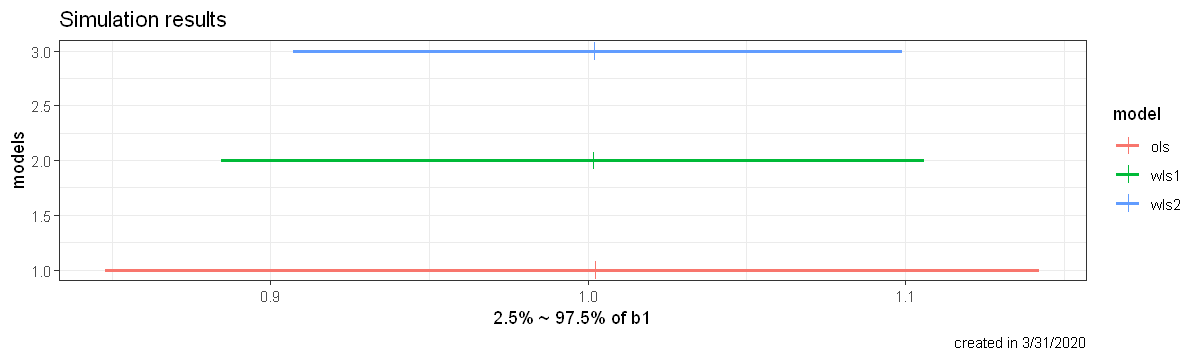

In [21]:
# set-up the size of the plot in jupyer notebook
options(repr.plot.width=10, repr.plot.height=3)

# generating the plot showing both the intervals and the means
ggplot() +
# line graph for intervals
    geom_line(data = result, aes(x = bounds, y = y, color = model), size = 1)+
# scatter plot for the means, which will be placed along the lines for each model
    geom_point(data = means, aes(x = averages, y = y, color = model), size = 3, shape = 3)+
# editing labels
    labs(x = "2.5% ~ 97.5% of b1",
         y = "models",    
         title = "Simulation results", 
         caption = "created in 3/31/2020")+
# black-white theme
    theme_bw()